In [1]:
%matplotlib notebook

import numpy as np

import tracepol

import matplotlib.pyplot as plt

# This notebooks demonstrates the use of the trace polynomial solutions.

First we need to compute the polynomial parameters.

In [2]:
tracepars = tracepol.get_tracepars()

/genesis/jwst/jwst-mtl/SOSS/trace/tracepol.py:104: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)
/genesis/jwst/jwst-mtl/SOSS/trace/tracepol.py:104: RankWarning: Polyfit may be poorly conditioned
  pars = trace_polynomial(trace, m=m)


Now we can convert wavelenghths to pixel coordinates as follows:

<IPython.core.display.Javascript object>


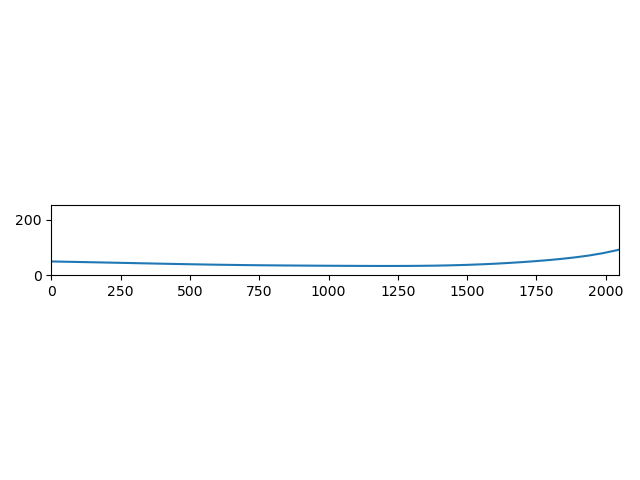

In [3]:
wave = np.linspace(0.6, 5, 100)

# Note mask will be False for invalid wavelenghts. 
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars) 

plt.figure()
plt.subplot(111, aspect=1)
plt.plot(specpix[mask], spatpix[mask])
plt.xlim(-0.5, 2047.5)
plt.ylim(-0.5, 255.5)

plt.tight_layout()
plt.show()

Or plotting all orders:

<IPython.core.display.Javascript object>


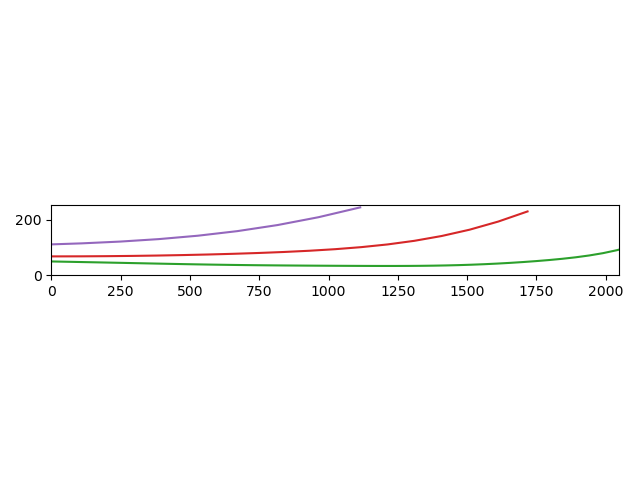

In [4]:
wave = np.linspace(0.6, 5, 100)

plt.figure()
plt.subplot(111, aspect=1)

for m in [-1, 0, 1, 2, 3]:
    specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, m=m)
    plt.plot(specpix[mask], spatpix[mask])
    
plt.xlim(-0.5, 2047.5)
plt.ylim(-0.5, 255.5)

plt.tight_layout()
plt.show()

Other coordinate frames, subarrays and oversampling are available through keywords:

In [5]:
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, frame='nat')
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, subarray='SUBSTRIP96')
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, oversample=2)

Coordinates can be transformed between frames as follows:

In [6]:
# By default returns dms SUBSTRIP256.
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars)  

# Converts any frame to nat SUBSTRIP256, the frame and subarray the polynomials are in.
specpix_ref, spatpix_ref = tracepol.pix_frame_to_ref(specpix, spatpix)  

# Converts the nat SUBSTRIP256 to dms SUBSTRIP96.
specpix, spatpix = tracepol.pix_ref_to_frame(specpix_ref, spatpix_ref, subarray='SUBSTRIP96') 

A more complex example is given by:

In [7]:
# Get coordinates in the sim SUBSTRIP96 oversampled by a factor 2.
specpix, spatpix, mask = tracepol.wavelength_to_pix(wave, tracepars, frame='sim', subarray='SUBSTRIP96', oversample=2)  

# Convert to oversampled nat SUBSTRIP256, the frame and subarray the polynomials are in.
specpix_ref, spatpix_ref = tracepol.pix_frame_to_ref(specpix, spatpix, frame='sim', subarray='SUBSTRIP96', oversample=2)  

# Converts the oversampled nat SUBSTRIP256 to oversampled dms SUBSTRIP256.
specpix, spatpix = tracepol.pix_ref_to_frame(specpix_ref, spatpix_ref, frame='dms', oversample=2) 

Notes:
1. It is always easier to call wavelength_to_pix with your desired frame subarray and oversampling factor.
2. oversampled coordinates can not be changed to a different oversampling factor by pix_frame_to_ref and pix_ref_to_frame.

We can also convert the spectral pixel axis to wavelength for a given order.

<IPython.core.display.Javascript object>


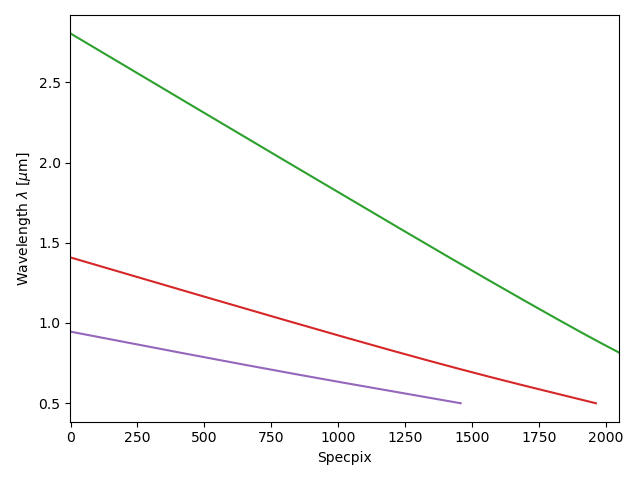

In [8]:
specpix = np.arange(2048)

plt.figure()
plt.subplot(111)

for m in [-1, 0, 1, 2, 3]:
    wavelength, mask = tracepol.specpix_to_wavelength(specpix, tracepars, m=m)
    plt.plot(specpix[mask], wavelength[mask])
    
plt.xlim(-0.5, 2047.5)
plt.xlabel('Specpix')
plt.ylabel(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  

Finally we can construct a 2D wavelength map in the dms frame:

<IPython.core.display.Javascript object>


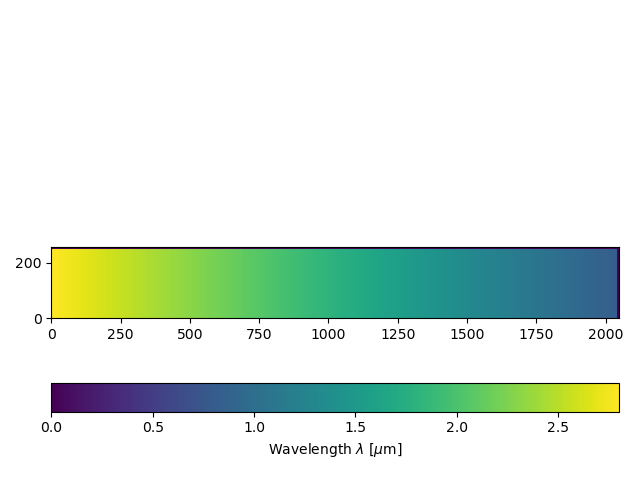

In [9]:
wavelength_map = tracepol.wavelength_map_2d(tracepars)

plt.figure()

plt.subplot(111, aspect=1)
plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()  

Or a more complex example:

<IPython.core.display.Javascript object>


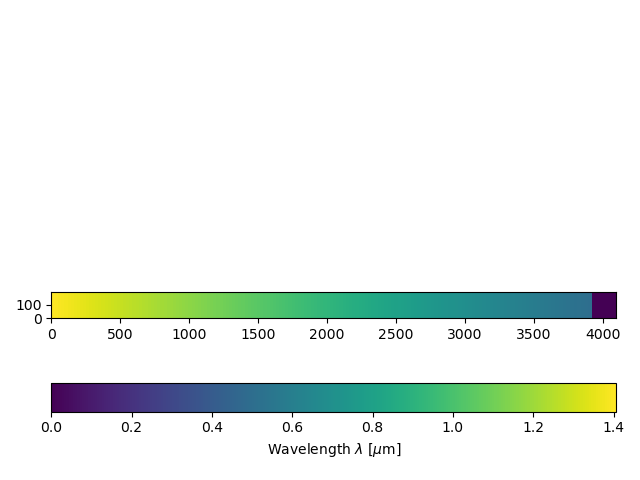

In [10]:
wavelength_map = tracepol.wavelength_map_2d(tracepars, m=2, subarray='SUBSTRIP96', oversample=2)

plt.figure()
plt.subplot(111, aspect=1)

plt.pcolormesh(wavelength_map)

cb = plt.colorbar(orientation='horizontal')
cb.set_label(r'Wavelength $\lambda$ [$\mu$m]')

plt.tight_layout()
plt.show()